# Predicting malignant versus benign breast cancer cases


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier


In [4]:
df = pd.read_csv('data.csv')

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**clean and prepare the data**

In [6]:
df.drop('id', axis=1, inplace = True)
df.drop("Unnamed: 32",axis=1,inplace=True)


In [7]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})


In [8]:
print(df.describe().T) #Needs scaling

                         count        mean         std         min  \
diagnosis                569.0    0.372583    0.483918    0.000000   
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se        

In [9]:
Y = df["diagnosis"].values
X = df.drop(labels = ["diagnosis"], axis=1)

In [10]:
L=X.columns

In [11]:
from sklearn import preprocessing
import numpy as np
scaler  = preprocessing.StandardScaler()
X[L] =scaler.fit_transform(X)
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


**explore the data**


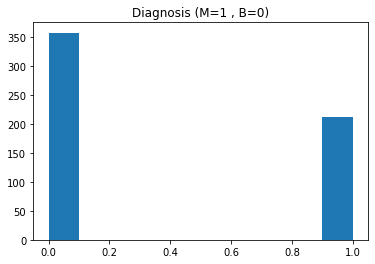

In [12]:
plt.hist(df['diagnosis'])
plt.title('Diagnosis (M=1 , B=0)')
plt.show()

**Choose our variables for the model**


In [13]:
mean_features=list(df.columns[1:11])
se_features=list(df.columns[11:21])
worst_features=list(df.columns[21:31])



In [14]:
mean_features.append('diagnosis')
se_features.append('diagnosis')
worst_features.append('diagnosis')

In [15]:
df[mean_features].corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.730029
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.415185
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.742636
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.708984
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.358560
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.596534
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.696360
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.776614
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.330499
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,-0.012838


In [16]:
df[se_features].corr()

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,diagnosis
radius_se,1.000000,0.213247,0.972794,0.951830,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754,0.567134
texture_se,0.213247,1.000000,0.223171,0.111567,0.397243,0.231700,0.194998,0.230283,0.411621,0.279723,-0.008303
perimeter_se,0.972794,0.223171,1.000000,0.937655,0.151075,0.416322,0.362482,0.556264,0.266487,0.244143,0.556141
area_se,0.951830,0.111567,0.937655,1.000000,0.075150,0.284840,0.270895,0.415730,0.134109,0.127071,0.548236
smoothness_se,0.164514,0.397243,0.151075,0.075150,1.000000,0.336696,0.268685,0.328429,0.413506,0.427374,-0.067016
compactness_se,0.356065,0.231700,0.416322,0.284840,0.336696,1.000000,0.801268,0.744083,0.394713,0.803269,0.292999
concavity_se,0.332358,0.194998,0.362482,0.270895,0.268685,0.801268,1.000000,0.771804,0.309429,0.727372,0.253730
concave points_se,0.513346,0.230283,0.556264,0.415730,0.328429,0.744083,0.771804,1.000000,0.312780,0.611044,0.408042
symmetry_se,0.240567,0.411621,0.266487,0.134109,0.413506,0.394713,0.309429,0.312780,1.000000,0.369078,-0.006522
fractal_dimension_se,0.227754,0.279723,0.244143,0.127071,0.427374,0.803269,0.727372,0.611044,0.369078,1.000000,0.077972


In [17]:
df[worst_features].corr()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
radius_worst,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492,0.776454
texture_worst,0.359921,1.000000,0.365098,0.345842,0.225429,0.360832,0.368366,0.359755,0.233027,0.219122,0.456903
perimeter_worst,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957,0.782914
area_worst,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647,0.733825
smoothness_worst,0.216574,0.225429,0.236775,0.209145,1.000000,0.568187,0.518523,0.547691,0.493838,0.617624,0.421465
compactness_worst,0.475820,0.360832,0.529408,0.438296,0.568187,1.000000,0.892261,0.801080,0.614441,0.810455,0.590998
concavity_worst,0.573975,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511,0.659610
concave points_worst,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114,0.793566
symmetry_worst,0.243529,0.233027,0.269493,0.209146,0.493838,0.614441,0.532520,0.502528,1.000000,0.537848,0.416294
fractal_dimension_worst,0.093492,0.219122,0.138957,0.079647,0.617624,0.810455,0.686511,0.511114,0.537848,1.000000,0.323872


In [18]:
prediction_var = ['radius_mean','perimeter_mean','area_mean','concave points_mean','radius_worst','perimeter_worst','area_worst']

**Create our training and test set data**


In [19]:
from sklearn.model_selection import train_test_split


In [20]:
#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print("Shape of training data is: ", X_train.shape)
print("Shape of testing data is: ", X_test.shape)

Shape of training data is:  (426, 30)
Shape of testing data is:  (143, 30)


**Train our model**


In [21]:
# Import multiple options, to enable us to try out different classifiers

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [22]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2)) #MultiLayer Perceptron 

In [23]:
# Training the model to fit the data in our training sets

model.fit(X_train, y_train)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), solver='lbfgs')

**Calculate our performance metrics**

In [24]:
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix(y_test,model.predict(X_test))

array([[83,  6],
       [ 2, 52]], dtype=int64)

In [26]:
y_true = y_test
y_pred = model.predict(X_test)
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

recall = recall_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)

print("The recall score is ", "%.2f" %recall)
print("The precision score is ", "%.2f" %precision)

The recall score is  0.96
The precision score is  0.90


In [27]:
# Therefore, we can calculate it this way:
F1 = 2 * (precision * recall) / (precision + recall)
print("%.2f" %F1)


0.93


In [28]:
# Or this way:
from sklearn.metrics import f1_score

f1_score = f1_score(y_true, y_pred)

print("The f1 score is ", "%.2f" %f1_score)
# And finally, accuracy and AUC:

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score 

accuracy = accuracy_score(y_true, y_pred)
AUC = roc_auc_score(y_true, y_pred)

print("The accuracy is ", "%.2f" %accuracy)
print("The AUC is ", "%.2f" %AUC)

The f1 score is  0.93
The accuracy is  0.94
The AUC is  0.95


**classification model**


In [29]:
data=X
data['diagnosis']=Y

In [30]:
#Generic function for making a classification model and accessing the performance. 
# From AnalyticsVidhya tutorial
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
    #Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5)
    error = []
    for train, test in kf.split(data):
        # Filter training data
        train_predictors = (data[predictors].iloc[train,:])

        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[train]

        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)

        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))

        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])

**regression**

In [31]:
prediction_var
outcome_var='diagnosis'
model=LogisticRegression()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 95.079%
Cross-Validation Score : 87.719%
Cross-Validation Score : 90.351%
Cross-Validation Score : 92.982%
Cross-Validation Score : 93.421%
Cross-Validation Score : 94.029%


**Decision Tree Model**


In [32]:
model = DecisionTreeClassifier()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 90.351%
Cross-Validation Score : 91.228%
Cross-Validation Score : 93.567%
Cross-Validation Score : 93.202%
Cross-Validation Score : 92.968%


Here we are over-fitting the model probably due to the large number of predictors. Let use a single predictor, the obvious one is the radius of the cell.



**Randome Forest**

In [33]:
# Use all the features of the nucleus
model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 95.958%
Cross-Validation Score : 86.842%
Cross-Validation Score : 89.035%
Cross-Validation Score : 92.105%
Cross-Validation Score : 92.325%
Cross-Validation Score : 92.798%


An advantage with Random Forest is that it returns a feature importance matrix which can be used to select features. So lets select the top 5 features and use them as predictors.



In [34]:
#Create a series with feature importances:
featimp = pd.Series(model.feature_importances_, index=prediction_var).sort_values(ascending=False)
print(featimp)

area_worst             0.219948
radius_worst           0.214208
perimeter_worst        0.213320
concave points_mean    0.177898
perimeter_mean         0.099969
area_mean              0.043888
radius_mean            0.030769
dtype: float64


In [35]:
# Using top 5 features
predictor_var = ['concave points_mean','perimeter_worst','area_worst','radius_worst','perimeter_mean','area_mean',]
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=2)
classification_model(model,data,predictor_var,outcome_var)

Accuracy : 95.958%
Cross-Validation Score : 86.842%
Cross-Validation Score : 89.474%
Cross-Validation Score : 92.690%
Cross-Validation Score : 92.763%
Cross-Validation Score : 93.149%


**other models**

In [48]:
model = KNeighborsClassifier()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 96.837%
Cross-Validation Score : 90.351%
Cross-Validation Score : 89.912%
Cross-Validation Score : 92.982%
Cross-Validation Score : 93.421%
Cross-Validation Score : 94.383%


In [49]:
model = SVC()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 94.376%
Cross-Validation Score : 88.596%
Cross-Validation Score : 90.351%
Cross-Validation Score : 92.690%
Cross-Validation Score : 93.202%
Cross-Validation Score : 93.853%


In [52]:
model = AdaBoostClassifier()
classification_model(model,data,prediction_var,outcome_var)

Accuracy : 99.297%
Cross-Validation Score : 90.351%
Cross-Validation Score : 90.789%
Cross-Validation Score : 93.567%
Cross-Validation Score : 93.860%
Cross-Validation Score : 93.672%


# deep learning 


In [36]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [37]:
model = Sequential()
model.add(Dense(16, input_dim=30, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 
 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                496       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
#Fit with no early stopping or other callbacks
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=64,
                    validation_data=(X_test, y_test))


Epoch 1/100
7/7 [==============================] - 0s 23ms/step - loss: 0.9301 - accuracy: 0.3568 - val_loss: 0.7869 - val_accuracy: 0.5035
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.8334 - accuracy: 0.4507 - val_loss: 0.6782 - val_accuracy: 0.6154
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.7143 - accuracy: 0.5540 - val_loss: 0.5877 - val_accuracy: 0.6993
Epoch 4/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5991 - accuracy: 0.6808 - val_loss: 0.5136 - val_accuracy: 0.7972
Epoch 5/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5462 - accuracy: 0.7394 - val_loss: 0.4533 - val_accuracy: 0.8252
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.4880 - accuracy: 0.7887 - val_loss: 0.4037 - val_accuracy: 0.8531
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.4499 - accuracy: 0.8052 - val_loss: 0.3628 - val_accuracy: 0.8881
Epoch 8/100
7/7 [=========

7/7 [==============================] - 0s 4ms/step - loss: 0.0878 - accuracy: 0.9836 - val_loss: 0.0647 - val_accuracy: 0.9860
Epoch 60/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0887 - accuracy: 0.9836 - val_loss: 0.0642 - val_accuracy: 0.9860
Epoch 61/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0771 - accuracy: 0.9789 - val_loss: 0.0638 - val_accuracy: 0.9860
Epoch 62/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0907 - accuracy: 0.9765 - val_loss: 0.0633 - val_accuracy: 0.9860
Epoch 63/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0893 - accuracy: 0.9742 - val_loss: 0.0626 - val_accuracy: 0.9860
Epoch 64/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0833 - accuracy: 0.9836 - val_loss: 0.0620 - val_accuracy: 0.9860
Epoch 65/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0921 - accuracy: 0.9624 - val_loss: 0.0617 - val_accuracy: 0.9860
Epoch 66/100
7/7 [===============

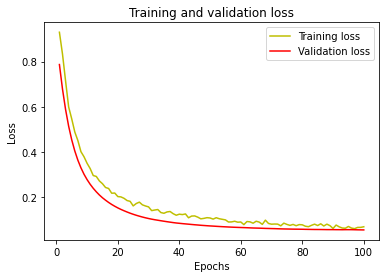

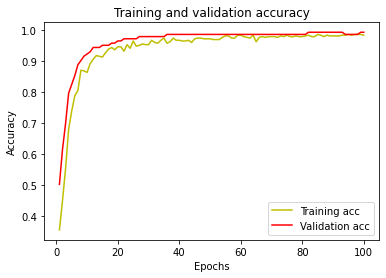

In [40]:
#plot the training and validation accuracy and loss at each epoch

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']  #Use accuracy if acc doesn't work
val_acc = history.history['val_accuracy']  #Use val_accuracy if acc doesn't work
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<AxesSubplot:>

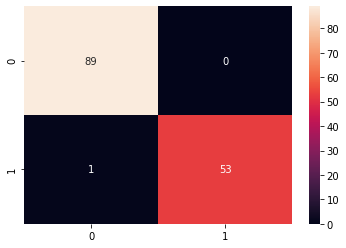

In [47]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)
